# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,51,92,38,71,174,66,7,154,43,19,133,181,355,130,70,4,24,189,195
1,320,105,54,100,220,69,10,221,30,25,170,232,718,202,73,0,13,187,199
2,119,93,49,79,180,65,7,173,37,21,158,189,463,194,70,5,10,197,202
3,503,91,39,72,133,55,7,146,46,19,132,170,314,149,77,9,18,184,189
4,557,86,40,66,138,59,4,137,49,18,133,162,279,151,74,6,14,186,190
5,676,82,43,73,158,68,7,151,44,19,145,181,337,173,80,2,17,183,188
6,410,89,45,77,188,64,9,161,41,20,151,190,390,174,66,4,2,194,201
7,96,89,42,80,151,62,6,144,46,19,139,166,308,170,74,17,13,185,189
8,665,90,47,85,161,64,10,163,42,20,160,177,389,185,73,9,0,185,195
9,457,83,45,73,161,68,8,142,46,18,144,169,305,179,71,10,3,191,199


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.659381,93.469945,44.723133,81.750455,168.870674,61.799636,8.559199,168.275046,41.098361,20.531876,147.624772,187.945355,436.948998,174.340619,72.502732,6.151184,12.517304,188.863388,195.613843
std,240.898172,8.219253,6.204236,16.123656,34.503830,8.412708,4.692618,32.993736,7.926520,2.559044,14.668272,31.378440,173.912306,32.975918,7.584228,4.882273,9.076227,6.196413,7.384900
min,2.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,230.000000,87.000000,39.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,136.000000,166.000000,314.000000,148.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,424.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,71.000000,5.000000,11.000000,188.000000,197.000000
75%,640.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,58.000000,110.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,203.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

model_preprocessing = StandardScaler()
X_train_transform = model_preprocessing.fit_transform(X_train)
X_test_transform = model_preprocessing.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression

from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
grid = {
    'C': np.append(np.linspace(0.01, 1, 5), np.arange(5, 24, 4)),
}

lr_grid_search = GridSearchCV(lr, param_grid=grid, n_jobs=-1, cv=5)
lr_grid_search.fit(X_train_transform, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.000e-02, 2.575e-01, 5.050e-01, 7.525e-01, 1.000e+00, 5.000e+00,
       9.000e+00, 1.300e+01, 1.700e+01, 2.100e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
from sklearn.metrics import accuracy_score, f1_score

best_lr = lr_grid_search.best_estimator_
steps = [
    ("standard_scaler", StandardScaler()),
    ("classifier", best_lr),
]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
f1 = f1_score(y_test, pred, average="weighted")
accuracy = accuracy_score(y_test, pred)

print(f"f1-score: {round(f1, 3)}")
print(f"Accuracy: {round(accuracy, 3)}")

f1-score: 0.819
Accuracy: 0.818


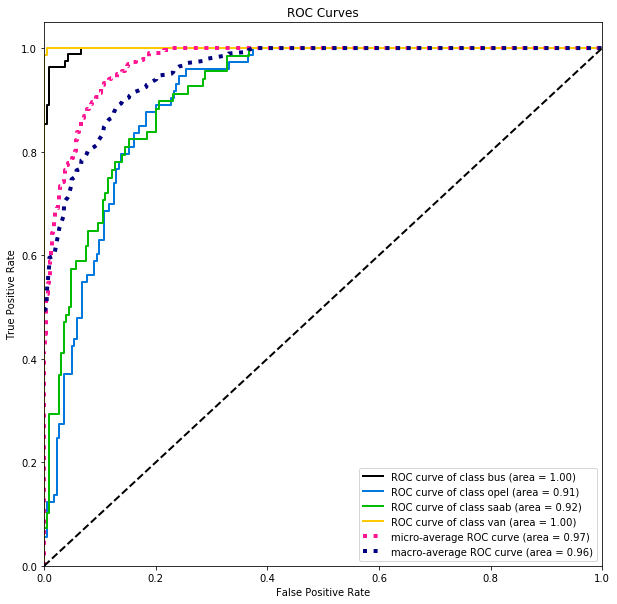

In [10]:
plot_roc(y_test, pipeline.predict_proba(X_test), figsize=(10, 10))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [11]:
from sklearn.decomposition import PCA

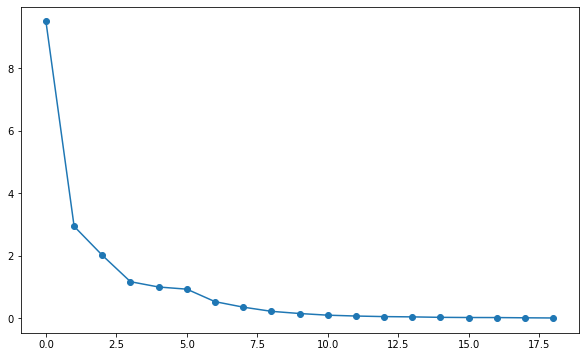

In [12]:
pca = PCA()
pca.fit(X_train_transform)
plt.figure(figsize=(10,6))
plt.plot(np.arange(19), pca.explained_variance_, marker='o')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [13]:
steps = [
    ("standard_scaler", StandardScaler()),
    ("PCA", PCA(n_components=10)),
]
pca_10_pipe = Pipeline(steps)

pca_10_pipe.fit(X_train, y_train)
X_train_10 = pca_10_pipe.transform(X_train)
X_test_10 = pca_10_pipe.transform(X_test)

#### Answers:

- Выбрал 10 компонент, так как на графике не видно изменений после 10 компоненты.
- Нормализовал, так как РСА очень чувствителен к ненормированным данным. Могут быть неверно выбранные компоненты.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
steps = [
    ("standard_scaler", StandardScaler()),
    ("PCA", PCA(n_components=10)),
    ("classifier", lr)
]
lr_pipe = Pipeline(steps)
grid = {
    'classifier__C': np.append(np.linspace(0.01, 1, 5), np.arange(5, 24, 4)),
}

lr_grid_search = GridSearchCV(lr_pipe, param_grid=grid, n_jobs=-1, cv=5)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=10, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classifier',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                             

In [15]:
best_lr_pipe = lr_grid_search.best_estimator_
best_lr_pipe.fit(X_train, y_train)

pred = best_lr_pipe.predict(X_test)
f1 = f1_score(y_test, pred, average="weighted")
accuracy = accuracy_score(y_test, pred)

print(f"f1-score: {round(f1, 3)}")
print(f"Accuracy: {round(accuracy, 3)}")

f1-score: 0.739
Accuracy: 0.744


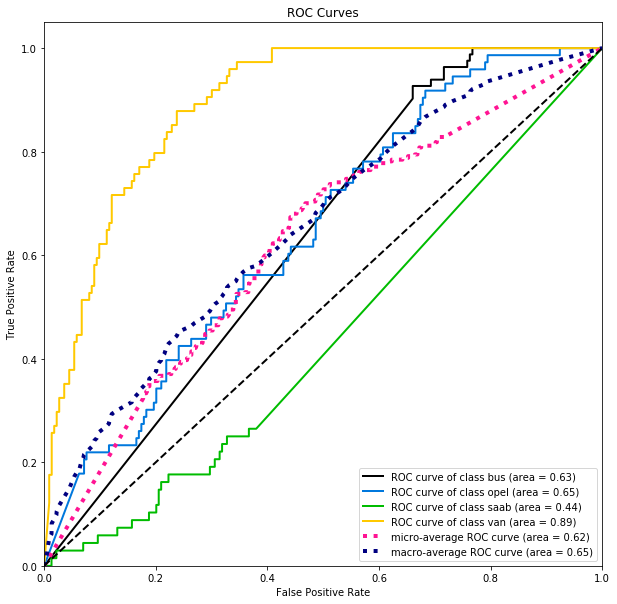

In [16]:
plot_roc(y_test, best_lr.predict_proba(X_test), figsize=(10,10))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(random_state=10)
grid = {
    "max_depth": np.arange(1,40),
}
tree_grid_search = GridSearchCV(tree, grid)

tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

In [19]:
best_tree = tree_grid_search.best_estimator_

pred = best_tree.predict(X_test)
f1 = f1_score(y_test, pred, average="weighted")
accuracy = accuracy_score(y_test, pred)

print(f"f1-score: {round(f1, 3)}")
print(f"Accuracy: {round(accuracy, 3)}")

f1-score: 0.72
Accuracy: 0.714


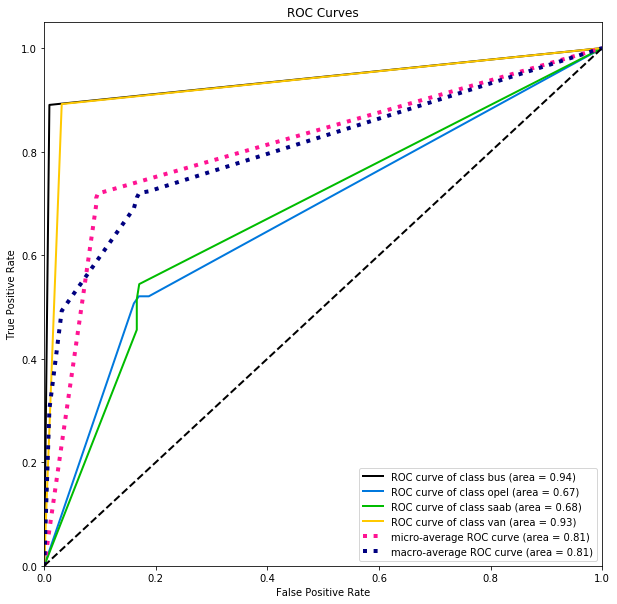

In [20]:
plot_roc(y_test, best_tree.predict_proba(X_test), figsize=(10,10))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [31]:
from sklearn.ensemble import BaggingClassifier

In [49]:
N = np.arange(2, 100, 5)

f1_scores = []
accuracy_scores = []

for i in N:
    model = BaggingClassifier(base_estimator=best_lr_pipe,
                             n_estimators=i,
                             n_jobs=-1).fit(X_train, y_train)
    
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, pred, average='weighted'))
    accuracy_scores.append(accuracy_score(y_test, pred))

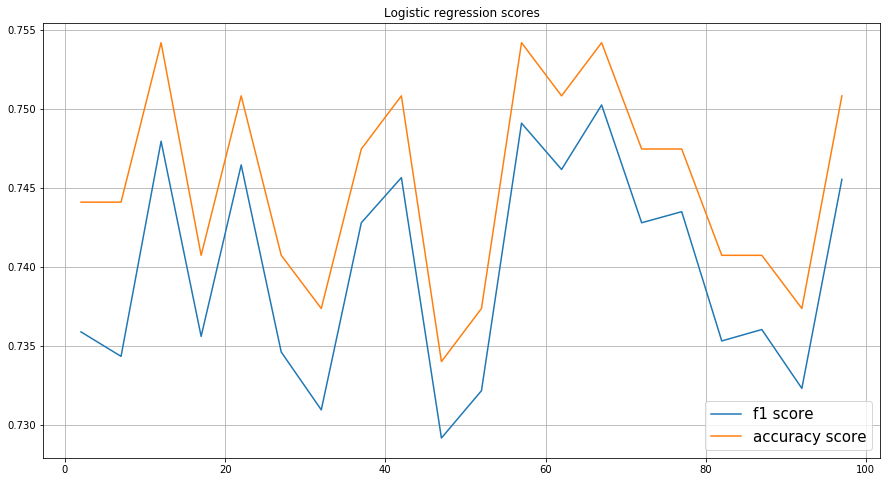

In [50]:
plt.figure(figsize=(15,8))
plt.plot(N, f1_scores, label="f1 score")
plt.plot(N, accuracy_scores, label="accuracy score")
plt.title("Logistic regression scores")
plt.grid(which='both')
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [51]:
f1_scores = []
accuracy_scores = []

for i in N:
    model = BaggingClassifier(base_estimator=best_tree,
                             n_estimators=i,
                             n_jobs=-1).fit(X_train, y_train)
    
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, pred, average='weighted'))
    accuracy_scores.append(accuracy_score(y_test, pred))

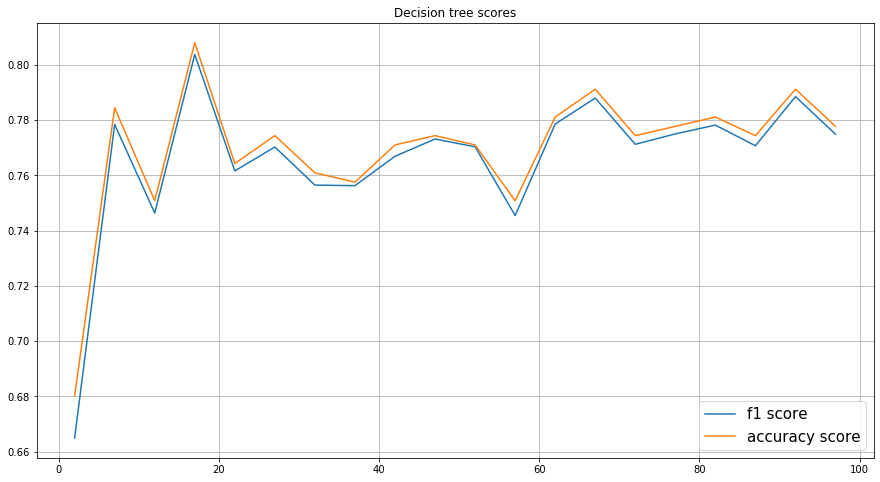

In [52]:
plt.figure(figsize=(15,8))
plt.plot(N, f1_scores, label="f1 score")
plt.plot(N, accuracy_scores, label="accuracy score")
plt.title("Decision tree scores")
plt.grid(which='both')
plt.legend(loc='lower right', fontsize=15)
plt.show()

- Logistic regression - 57
- Decision tree - 17

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [53]:
from sklearn.ensemble import RandomForestClassifier

f1_scores = []
accuracy_scores = []

for i in N:
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, pred, average='weighted'))
    accuracy_scores.append(accuracy_score(y_test, pred))

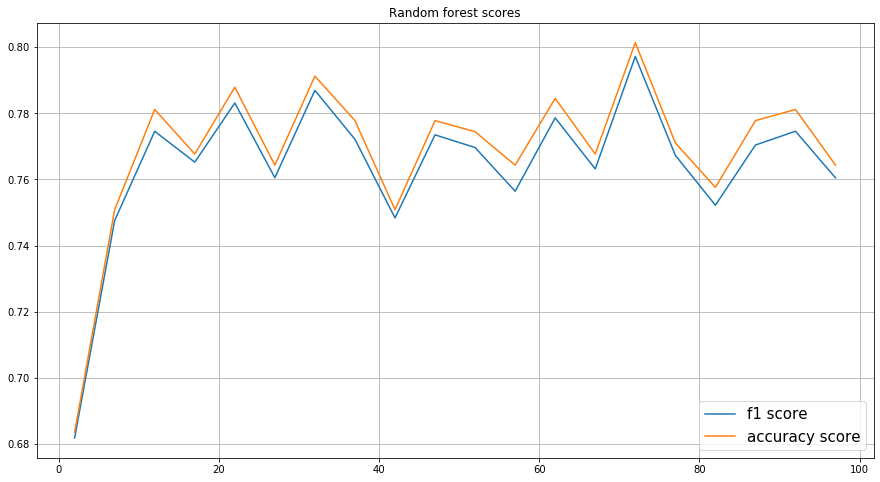

In [54]:
plt.figure(figsize=(15,8))
plt.plot(N, f1_scores, label="f1 score")
plt.plot(N, accuracy_scores, label="accuracy score")
plt.title("Random forest scores")
plt.grid(which='both')
plt.legend(loc='lower right', fontsize=15)
plt.show()

#### Answers:
- Random forest - 72
- Да, имеются различия с результатами из пункта 2.6, так как имеются отличия в реализации модели.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [70]:
train_sizes = np.linspace(0, X_train.shape[0], 10, dtype=int)[1:]
f1_scores = {
    'lr': [],
    'tree': [],
    'forest': [],
}
accuracy_scores = {
    'lr': [],
    'tree': [],
    'forest': [],
}

for size in train_sizes:
    lr_model = BaggingClassifier(base_estimator=best_lr_pipe, n_estimators=57, n_jobs=-1)
    lr_model.fit(X_train[:size], y_train[:size])
    lr_pred = lr_model.predict(X_test)
    f1_scores['lr'].append(f1_score(y_test, lr_pred, average='weighted'))
    accuracy_scores['lr'].append(accuracy_score(y_test, lr_pred))
    
    tree_model = BaggingClassifier(base_estimator=best_tree, n_estimators=17, n_jobs=-1)
    tree_model.fit(X_train[:size], y_train[:size])
    tree_pred = tree_model.predict(X_test)
    f1_scores['tree'].append(f1_score(y_test, tree_pred, average='weighted'))
    accuracy_scores['tree'].append(accuracy_score(y_test, tree_pred))
    
    forest_model = RandomForestClassifier(n_estimators=72)
    forest_model.fit(X_train[:size], y_train[:size])
    forest_pred = forest_model.predict(X_test)
    f1_scores['forest'].append(f1_score(y_test, forest_pred, average='weighted'))
    accuracy_scores['forest'].append(accuracy_score(y_test, forest_pred))

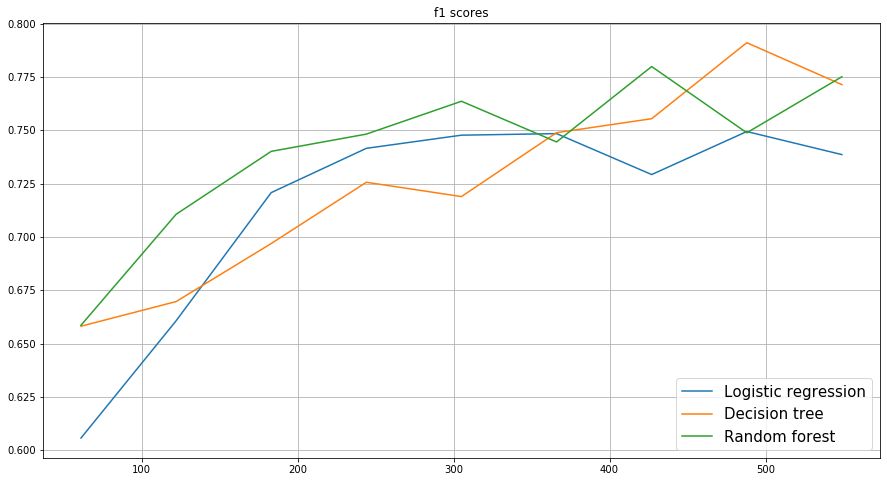

In [71]:
plt.figure(figsize=(15,8))
plt.plot(train_sizes, f1_scores['lr'], label="Logistic regression")
plt.plot(train_sizes, f1_scores['tree'], label="Decision tree")
plt.plot(train_sizes, f1_scores['forest'], label="Random forest")
plt.title("f1 scores")
plt.grid(which='both')
plt.legend(loc='lower right', fontsize=15)
plt.show()

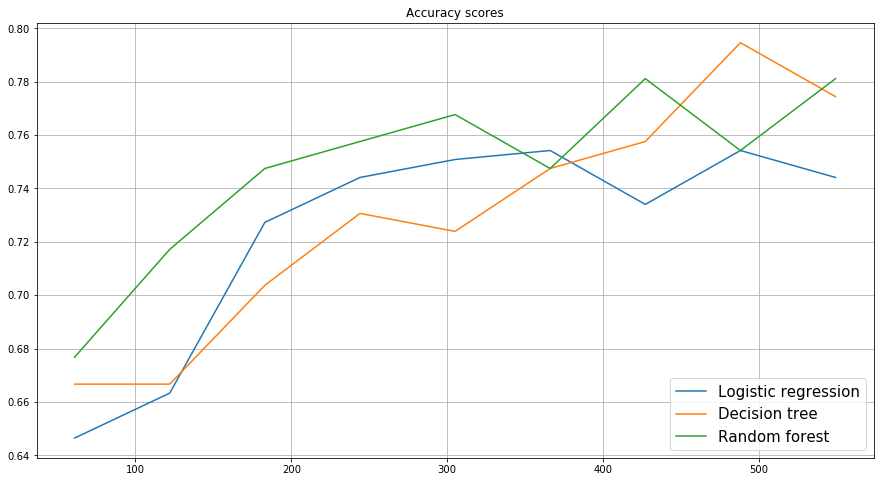

In [72]:
plt.figure(figsize=(15,8))
plt.plot(train_sizes, accuracy_scores['lr'], label="Logistic regression")
plt.plot(train_sizes, accuracy_scores['tree'], label="Decision tree")
plt.plot(train_sizes, accuracy_scores['forest'], label="Random forest")
plt.title("Accuracy scores")
plt.grid(which='both')
plt.legend(loc='lower right', fontsize=15)
plt.show()

#### Answers:

Во всех 3 можелях мы видим улучшение оценок при увеличении размера обучающей выборки. Отсюда можно сделать вывод, что надо больше данных и тогда получим более хороший результат.